Import stuff and initialize global parameters.

In [2]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.layers import Conv2D, Flatten, Dense, LSTM, \
    MaxPooling2D
from keras.models import Sequential
from common import extract_training_data_as_stacked
from sklearn.metrics import explained_variance_score

IMAGE_SIZE = (64, 64, 3)

Using TensorFlow backend.


# Convolutional network
Reading data as bundles and creating initial model.

In [3]:
images, labels = extract_training_data_as_stacked("Data/20171029-201949.h264.avi", "Data/20171029-201949.h264.csv", IMAGE_SIZE)

In [4]:
y_train = labels.as_matrix(columns=labels.columns[1: -1])
y_train.shape

(1741, 3)

In [5]:
model = Sequential()
model.add(Conv2D(32, (3, 3), kernel_initializer="he_normal", activation='relu', input_shape=(64, 64, 12)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(3, activation='linear'))

model.compile(loss="mse", optimizer="adam")
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        3488      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 30752)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 92259     
Total params: 95,747
Trainable params: 95,747
Non-trainable params: 0
_________________________________________________________________


In [6]:
history = model.fit(images, y_train, batch_size=64, epochs=10, validation_split=0.04)

Train on 1671 samples, validate on 70 samples
Epoch 1/10
1671/1671 [==============================] - 7s - loss: 6.7819 - val_loss: 0.3299
Epoch 2/10
1671/1671 [==============================] - 8s - loss: 0.2000 - val_loss: 0.1649
Epoch 3/10
1671/1671 [==============================] - 9s - loss: 0.1058 - val_loss: 0.2088
Epoch 4/10
1671/1671 [==============================] - 9s - loss: 0.0896 - val_loss: 0.2149
Epoch 5/10
1671/1671 [==============================] - 8s - loss: 0.0795 - val_loss: 0.2273
Epoch 6/10
1671/1671 [==============================] - 9s - loss: 0.0710 - val_loss: 0.2282
Epoch 7/10
1671/1671 [==============================] - 9s - loss: 0.0633 - val_loss: 0.2377
Epoch 8/10
1671/1671 [==============================] - 8s - loss: 0.0545 - val_loss: 0.2529
Epoch 9/10
1671/1671 [==============================] - 8s - loss: 0.0483 - val_loss: 0.2694
Epoch 10/10
1671/1671 [==============================] - 8s - loss: 0.0410 - val_loss: 0.2904


In [37]:
test_images, test_labels = extract_training_data_as_stacked("Data/20171029-201639.h264.avi", 
                                                            "Data/20171029-201639.h264.csv", 
                                                            IMAGE_SIZE)

prediction = model.predict(test_images)

### Convolutional network results
Testing prediction printout and graphs.

In [8]:
prediction

array([[ 0.21864463,  0.02655456,  1.005759  ],
       [ 0.18681493,  0.00499805,  1.00749838],
       [ 0.18856946,  0.0049597 ,  1.02159286],
       ..., 
       [ 0.34349927,  0.01496859,  1.03512764],
       [ 0.01777073, -0.08144344,  0.90272856],
       [-0.28708765,  0.1121528 ,  1.11473846]], dtype=float32)

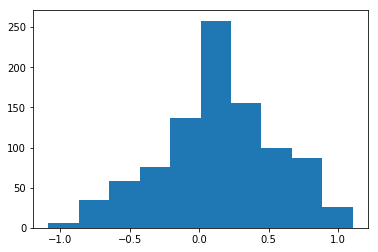

In [9]:
plt.hist(prediction[:, 0])
plt.show()

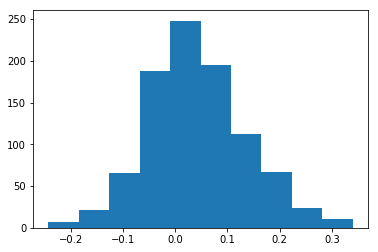

In [10]:
plt.hist(prediction[:, 1])
plt.show()

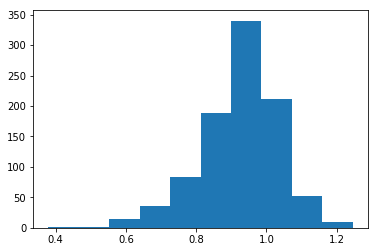

In [11]:
plt.hist(prediction[:, 2])
plt.show()

### Result analysis
Explained variance etc.

Firstly clip incorrect values back into known bounds. Afterwards find the explained variance.

In [35]:
validation_labels = test_labels.as_matrix(columns=test_labels.columns[1: -1])
clipped_prediction = np.zeros_like(prediction)

clipped_prediction[:, 0] = np.clip(prediction[:, 0], -1, 1)
clipped_prediction[:, 1] = np.clip(prediction[:, 1], 0, 1)
clipped_prediction[:, 2] = np.clip(prediction[:, 2], 0, 1)

print(validation_labels.shape)
print(clipped_prediction.shape)

(939, 3)
(939, 3)


In [36]:
explained_variance_score(validation_labels, clipped_prediction)

0.043267034740954245